In [2]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Introduction

Just trying some stuff here but the general idea is that taking the derivative with respect to temperature will give some insight into the temperature dependence of growth (and thus flux).

## Single Species

starting with logistic growth with temperature dependent growth:

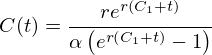

In [134]:
# defining differntial
t = var("t")
C = Function("C")(t)
dC = C.diff(t)

#and the RHS
r0,Er,Tdiff,a,r = var("r0,Er,T_{diff},alpha,r")
RHS = C*(r - a*C)

#solving
eq = Eq(dC,RHS)
sol = dsolve(eq)
sol

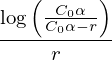

In [135]:
#solving for C0
t0 = sol.args[1].subs({t:0})
C0 = var("C0")
sol_eq = Eq(C0,t0)

C1 = sol_eq.args[1].args[3].args[0].args[0]
C1_sol = solve(sol_eq,C1)[0]
C1_sol

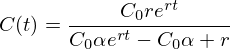

In [136]:
sol = simplify(sol.subs({C1:C1_sol}))
sol

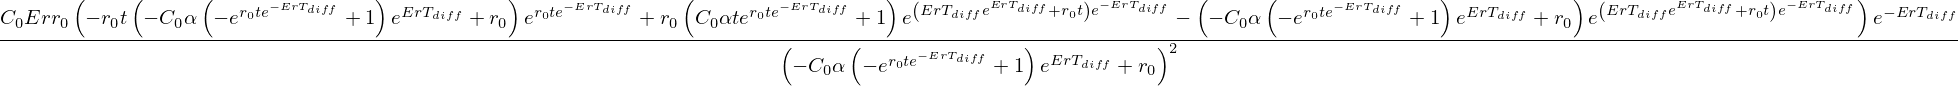

In [137]:
sol_T = sol.subs({r:r0 * exp(-Er*Tdiff)})
sol_T = simplify(sol_T.args[1].diff(Tdiff))

sol_T

In [146]:
diff_sin = RHS.subs({r:r0 * exp(-Er*Tdiff)}).subs({Tdiff:sin(t)})
solve(diff_sin,C)[1].subs({r0:1.0,Er:0.95,a:1.0})

In [150]:
p = RHS.subs({r:r0 * exp(-Er*Tdiff),C:solve(diff_sin,C)[1]}).series(Tdiff,0,2).removeO().subs({r0:1.0,Er:0.95,a:1.0})

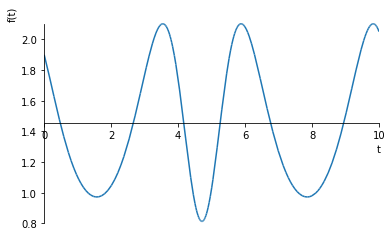

In [159]:
plot(p.subs({Tdiff:-2.0}),(t,0,10))